In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Img = cv2.imread('lena.jpg')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
h = Img.shape[0]
w = Img.shape[1]

### **OTSU**
- 优点
  - 速度快
- 缺点
  - 对噪声和目标大小十分敏感，仅对类间方差为单峰的图像产生较好的分割效果
  - 当目标与背景的大小比例悬殊时效果不好

![](information\OTSU.jpg)

In [5]:
def OTSU(img_gray, GrayScale):
    assert img_gray.ndim == 2, "must input a gary_img"  #shape有几个数字, ndim就是多少
    img_gray = np.array(img_gray).ravel().astype(np.uint8)
    u1=0.0#背景像素的平均灰度值
    u2=0.0#前景像素的平均灰度值
    th=0.0

    #总的像素数目
    PixSum=img_gray.size
    #各个灰度值的像素数目
    PixCount=np.zeros(GrayScale)
    #各灰度值所占总像素数的比例
    PixRate=np.zeros(GrayScale)
    #统计各个灰度值的像素个数
    for i in range(PixSum):
        #默认灰度图像的像素值范围为GrayScale
        Pixvalue=img_gray[i]
        PixCount[Pixvalue]=PixCount[Pixvalue]+1
    
    #确定各个灰度值对应的像素点的个数在所有的像素点中的比例。
    for j in range(GrayScale):
        PixRate[j]=PixCount[j]*1.0/PixSum
    Max_var = 0
    #确定最大类间方差对应的阈值
    for i in range(1,GrayScale):#从1开始是为了避免w1为0.
        u1_tem=0.0
        u2_tem=0.0
        #背景像素的比列
        w1=np.sum(PixRate[:i])
        #前景像素的比例
        w2=1.0-w1
        if w1==0 or w2==0:
            pass
        else:#背景像素的平均灰度值
            for m in range(i):
                u1_tem=u1_tem+PixRate[m]*m
            u1 = u1_tem * 1.0 / w1
             #前景像素的平均灰度值
            for n in range(i,GrayScale):
                u2_tem = u2_tem + PixRate[n]*n
            u2 = u2_tem / w2
            #print(u1)
            #类间方差公式：G=w1*w2*(u1-u2)**2
            tem_var=w1*w2*np.power((u1-u2),2)
            #print(tem_var)
            #判断当前类间方差是否为最大值。
            if Max_var<tem_var:
                Max_var=tem_var#深拷贝，Max_var与tem_var占用不同的内存空间。
                th=i
    return th 

### 迭代法
基本步骤如下：

![](information\ITER.jpg)

In [6]:
def ITER(Img):
    img2array = np.array(Img).astype(np.float32)
    Ti = (np.max(img2array) + np.min(img2array)) / 2
    Ti_end = 1
    while Ti_end == 0:
        greater, less, greater_num, less_num = 0, 0, 0, 0
        for i in range(1, h):#更新Ti
            for j in range(1, w):
                tmp = img2array[i, j]
                if tmp >= Ti:#分为两部分（大于和小于）并计算它们的灰度均值
                    greater = greater + 1
                    greater_num = greater_num + int(tmp)
                else:
                    less = less + 1
                    less_num = less_num + int(tmp)
        miu1 = int(greater_num / greater)
        miu2 = int(less_num / less)
        if Ti == int((miu1 + miu2) / 2):
            Ti_end = 0
        else:
            Ti = int((miu1 + miu2) / 2)#更新阈值
    return Ti


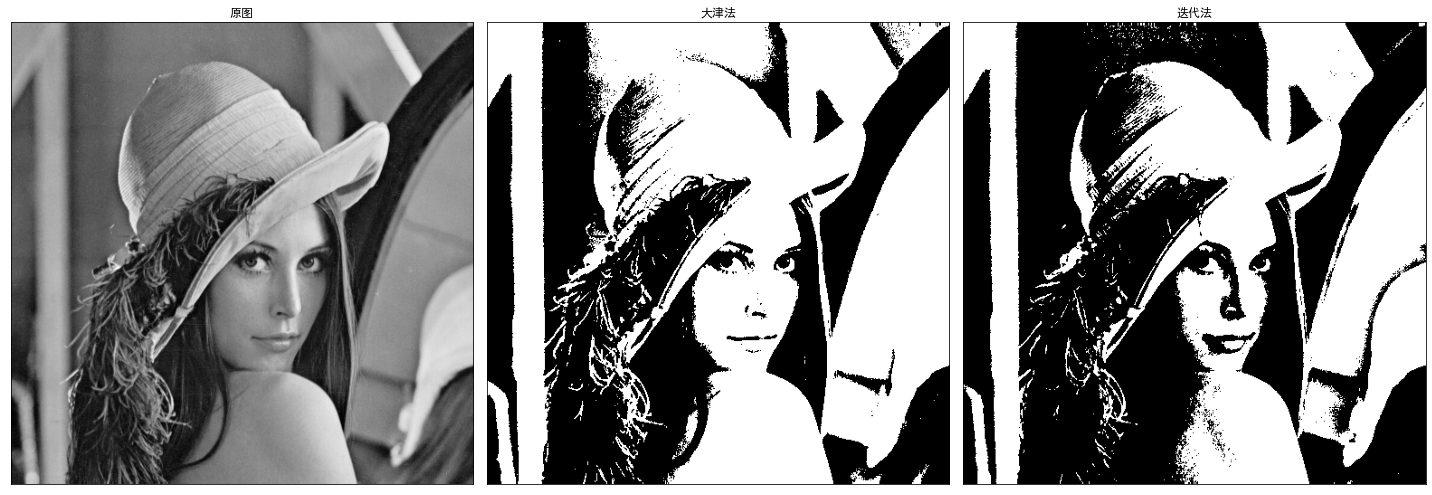

(None, None)

In [13]:
grayscale = 256
retVal_otsu, otsu = cv2.threshold(Img, OTSU(Img, grayscale), 255, cv2.THRESH_BINARY)
retVal_iter, iter = cv2.threshold(Img, ITER(Img), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(Img, 'gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(otsu, 'gray'), plt.title('大津法'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(iter, 'gray'), plt.title('迭代法'), plt.xticks([]), plt.yticks([])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout(), plt.show()